# **Zomato Data Analysis Project**

In this project, we will analyze the Zomato restaurant data to gain insights into customer preferences, restaurant types, ratings, and more.
The analysis includes:
 - Restaurant Type Distribution
 - Votes by Restaurant Type
 - Rating Distribution
 - Spending Analysis
 - Online vs Offline Order Comparison

## Step 1: Importing Libraries
We will start by importing the necessary libraries for data manipulation and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Loading and Inspecting the Dataset
We will load the dataset and inspect the first few rows and general info to understand its structure.

In [2]:
# Load the dataset
df = pd.read_csv('Zomato_Data.csv')

# Display basic information and first few rows
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Step 3: Data Cleaning and Preprocessing
In this step, we will clean and preprocess the data. This includes:
 - Handling the 'rate' column (converting it to a numeric value).
 - Renaming columns for clarity and consistency.


In [3]:
# Function to handle the 'rate' column and convert it to a numeric value
def handleRate(value):
    try:
        value = str(value).split('/')[0]  # Extract the rating value before '/'
        return float(value)
    except:
        return np.nan  # Handle missing or erroneous values

# Apply the function to the 'rate' column
df['rate'] = df['rate'].apply(handleRate)

# Renaming columns for consistency
df.rename(columns={
    'approx_cost(for two people)': 'cost_for_two',
    'listed_in(type)': 'restaurant_type'
}, inplace=True)

# Check for NULL values in the dataset
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 name               0
online_order       0
book_table         0
rate               0
votes              0
cost_for_two       0
restaurant_type    0
dtype: int64


## Step 4: Exploratory Data Analysis (EDA)
We will now perform several analyses to gain insights from the data.

### 1) Restaurant Type Distribution
First, let's analyze the distribution of restaurant types and visualize which type of restaurant is the most common.

Majority Restaurant Type: Dining
Counts:
 restaurant_type
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


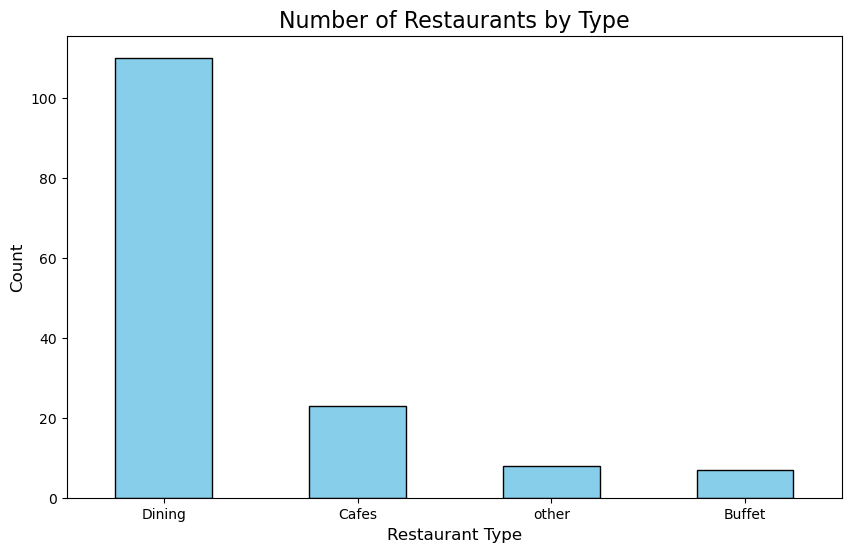

In [4]:
# Count the number of restaurants by type
restaurant_type_counts = df['restaurant_type'].value_counts()

# Display the majority type
print("Majority Restaurant Type:", restaurant_type_counts.idxmax())
print("Counts:\n", restaurant_type_counts)

# Visualization: Bar chart of restaurant types
plt.figure(figsize=(10, 6))  
restaurant_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Restaurants by Type", fontsize=16)
plt.xlabel("Restaurant Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()


**Result:** The majority of the restaurants fall in the **Dining** category.

### 2) Total Votes by Restaurant Type
Let's examine how many votes each type of restaurant has received in total.

Total Votes by Restaurant Type:
 restaurant_type
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


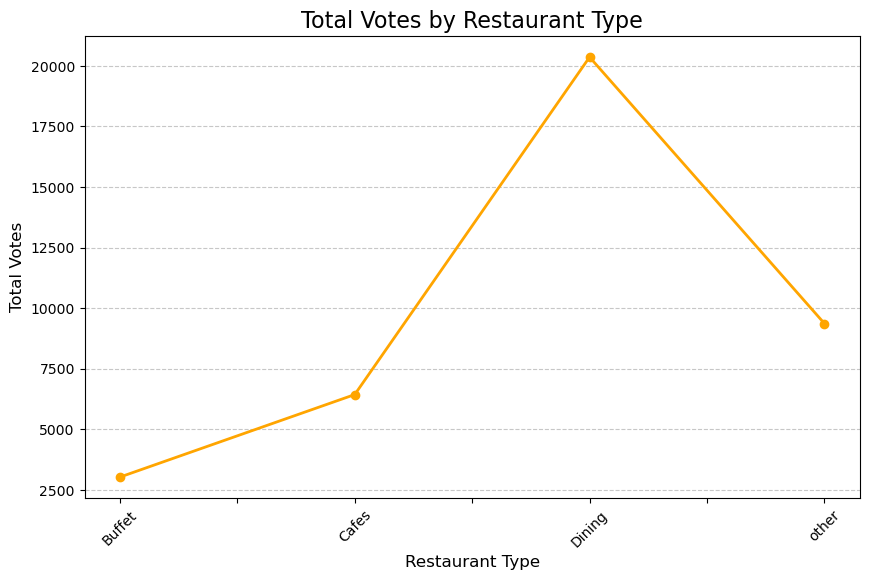

In [5]:
# Group the data by 'restaurant_type' and sum the votes
votes_by_type = df.groupby('restaurant_type')['votes'].sum()

# Display the results
print("Total Votes by Restaurant Type:\n", votes_by_type)

# Visualization: Line graph to show total votes by restaurant type
plt.figure(figsize=(10, 6))
votes_by_type.plot(kind='line', marker='o', color='orange', linestyle='-', linewidth=2)
plt.title("Total Votes by Restaurant Type", fontsize=16)
plt.xlabel("Restaurant Type", fontsize=12)
plt.ylabel("Total Votes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Result:** The **Dining** restaurant type has received the maximum number of votes.

### 3) Rating Distribution
Let's check the distribution of ratings across all restaurants.

Most Common Rating: 3.8
Rating Distribution:
 rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64


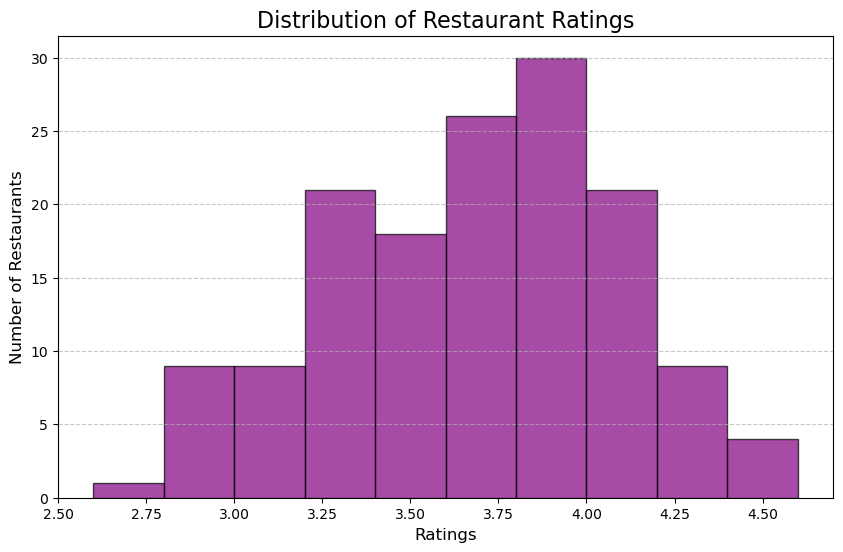

In [6]:
# Count the number of restaurants for each rating
rating_distribution = df['rate'].value_counts()

# Display the most common rating
print("Most Common Rating:", rating_distribution.idxmax())
print("Rating Distribution:\n", rating_distribution)

# Visualization: Histogram of rating distribution
plt.figure(figsize=(10, 6))
plt.hist(df['rate'].dropna(), bins=10, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribution of Restaurant Ratings", fontsize=16)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Result:** The majority of restaurants received ratings between **3.5 to 4**.

### 4) Average Spending by Couples
Zomato has observed that most couples prefer to order food online. Let's analyze the average spending per order.

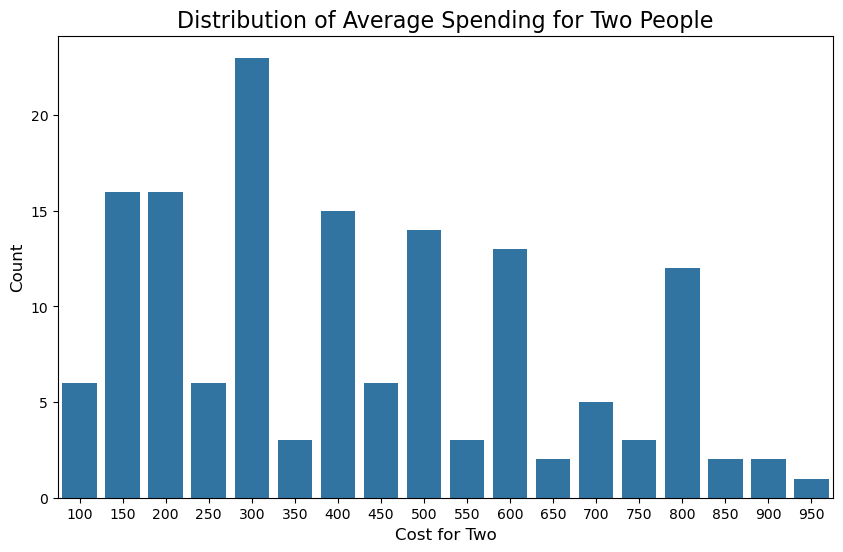

In [7]:
# Analyze spending by couples
couple_data = df['cost_for_two']

# Visualization: Distribution of cost for two
plt.figure(figsize=(10, 6))
sns.countplot(x=couple_data)
plt.title("Distribution of Average Spending for Two People", fontsize=16)
plt.xlabel("Cost for Two", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**Result:** Majority of couples prefer restaurants with a cost of approximately Rs. 300 for two.

### 5) Online vs Offline Ratings
Let's compare the ratings between online and offline orders.

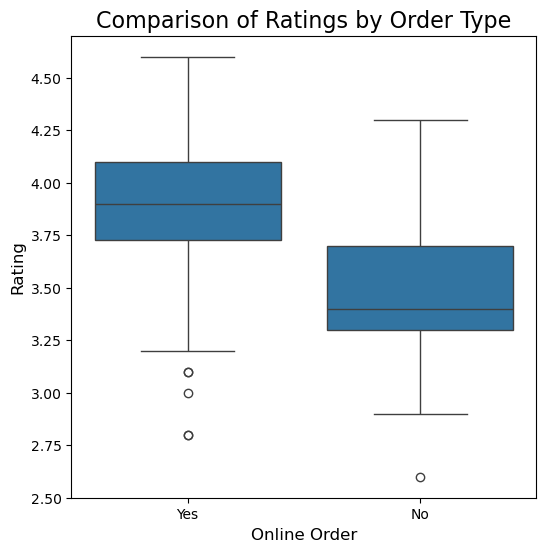

In [8]:
# Visualization: Box plot to compare ratings by order type
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Comparison of Ratings by Order Type", fontsize=16)
plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.show()

**Result:** Online orders tend to receive more positive ratings than offline orders.

### 6) Restaurant Types with More Offline Orders
We will now analyze which restaurant types receive more offline orders and suggest where Zomato could offer more promotions.

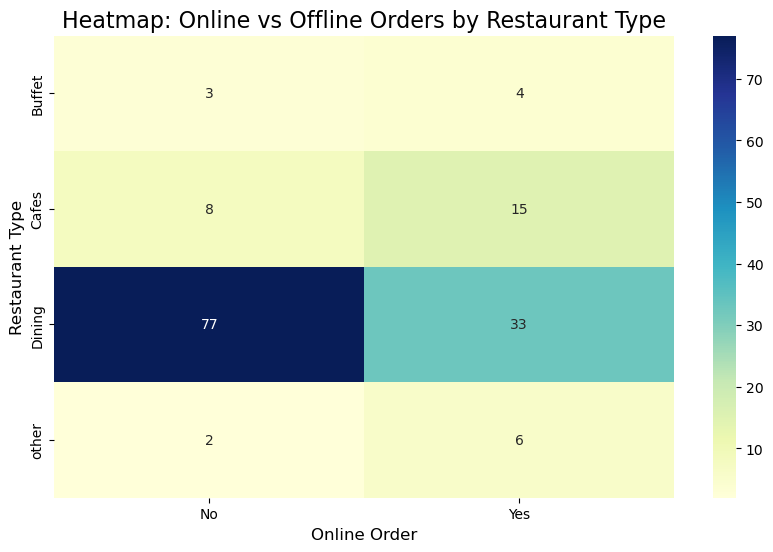

In [9]:
# Create a pivot table to analyze online vs offline orders by restaurant type
pivot_table = df.pivot_table(index='restaurant_type', columns='online_order', aggfunc='size', fill_value=0)

# Visualization: Heatmap to show the distribution of online vs offline orders by restaurant type
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap: Online vs Offline Orders by Restaurant Type", fontsize=16)
plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Restaurant Type", fontsize=12)
plt.show()

**Result:** **Dining restaurants** receive more offline orders compared to other types, suggesting that Zomato could focus on offering more promotions for these customers.

## Conclusion:
- **Dining** restaurants dominate in terms of type, votes, and offline orders.
- Restaurants with ratings between **3.5 to 4** are the most common.
- Zomato could provide additional offers to **Dining** restaurants that receive more offline orders, while also exploring ways to boost online orders.
